### **Group members**
Vracevic Nikola, Turki Mohamed Dhia, Ligono Lisah

# **Chicago Train Ridership**
This dataset was borrowed from the work of Kuhn and Johnson (2020) where they compiled many sources for the purpose of performing exploratory visualizations and analysis using R. We will drop their predictions ('ridership' column) about modeling the number of people (in thousands) who enter the *Clark/Lake* station and we will proceed to build our own regression model to predict the number of passengers in the *Clark/Lake* station based on weather data, events happening in the city and ridership on other stations.

# **Data description**
The data was downloaded from:

*   https://vincentarelbundock.github.io/Rdatasets/articles/data.html.



Further documentation can be found at:

*   https://vincentarelbundock.github.io/Rdatasets/doc/modeldata/Chicago.html,

*   https://github.com/topepo/FES and

*   http://www.feat.engineering/.

Data consists of daily ridership at 20 stations of Chicago Transit Authority (CTA) “L” train system from 22/01/2001 to 28/08/2016. As stated before that the dataset is borrowed from the work of Kuhn and Johnson (2020), original ridership data can also be found at:

*   https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f.


Beside the ridership value at 20 stations, other explanatory variables are:


*  temp_min (fahrenheit); representing the minimum temperature;

*  temp (fahrenheit): representing the median temperature;

*  temp_max (fahrenheit): representing the maximum temperature;

*   temp_change (fahrenheit): represents the change in temperature (max-min);

*   dew (fahrenheit): represents the dew point;

*   humidity (%): relative humidity;

*   pressure (inHg): air pressure;


*   pressure_change (inHg): air pressure change since previous measurment;


*   wind, wind_max, gust, gust_max (mph/h);


*   precip, precip_max, weather_rain, weather_snow, weather_cloud (%): percentage of the day that specific metorological state occured;

*   Blackhawks_Away, Blackhawks_Home, Bulls_Away, Bulls_Home, Bears_Away, Bears_Home, WhiteSox_Away, WhiteSox_Home, Cubs_Away, Cubs_Home (binary): sporting events for different teams - away or home game AND

*   date: date.


**We will be predicting the ridership in the *Clark/Lake* station as it is the central station of the L line.**

*As extra analysis, we could attempt to detect correlations between the weather and/or events on specific and/or general affluence in stations.*

## Map Visualisation

In [ ]:
import folium

# Station locations
station_locations = {
    'Austin': [41.870851, -87.773081],
    'Quincy Wells': [41.878723, -87.633739],
    'Belmont': [41.939751, -87.653907],
    'Archer 35th': [41.829353, -87.680622],
    'Oak Park': [41.872108, -87.794124],
    'Western': [41.875478, -87.686952],
    'Clark/Lake': [41.885737, -87.630886],
    'Clinton': [41.875539, -87.640984],
    'Merchandise Mart': [41.888717, -87.633727],
    'Irving_Park': [41.953364, -87.730165],
    'Washington Wells': [41.883164, -87.633007],
    'Harlem': [41.873549, -87.806961],
    'Monroe': [41.880745, -87.629630],
    'Polk': [41.871551, -87.669053],
    'Ashland': [41.885590, -87.666225],
    'Kedzie': [41.854109, -87.705309],
    'Addison': [41.947428, -87.653626],
    'Jefferson Park': [41.970634, -87.760892],
    'Montrose': [41.960672, -87.743580],
    'California': [41.921939, -87.696895],
}

# Club stadium locations
club_locations = {
    'Blackhawks/Bulls': [41.880684, -87.674013],
    'Bears': [41.862306, -87.616672],
    'WhiteSox': [41.829893, -87.633194],
    'Cubs': [41.947428, -87.653626],
}

# Create a map centered around Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# Add station markers to the map
for station, location in station_locations.items():
    # Highlight the station called "Clark_Lake"
    if station == "Clark/Lake":
        folium.Marker(location, popup=folium.Popup(station, parse_html=True), icon=folium.Icon(color='red' )).add_to(chicago_map)
    else:
        folium.Marker(location, popup=folium.Popup(station, parse_html=True), icon=folium.Icon(color='blue')).add_to(chicago_map)

# Add club stadium markers to the map with different colors
for club, location in club_locations.items():
  folium.Marker(location, popup=folium.Popup(club, parse_html=True), icon=folium.Icon(color='green')).add_to(chicago_map)


# Add a legend with symbols matching the markers on the map
legend_html = """
<div style="position: fixed;
             bottom: 50px; left: 50px; width: 200px; height: 90px;
             border:2px solid grey; z-index:9999; font-size:14px;
             background-color: white;
             ">
 <b>Legend </b> <br>
 &nbsp; Clark/Lake &nbsp; <i class="fas fa-map-marker-alt" style="color:red"></i> <br>
 &nbsp; Other Stations &nbsp; <i class="fas fa-map-marker-alt" style="color:blue"></i> <br>
 &nbsp; Stadiums &nbsp; <i class="fas fa-map-marker-alt"" style="color:green"></i> <br>
>
</div>
"""
chicago_map.get_root().html.add_child(folium.Element(legend_html))

# Add title to the map
title_html = """
<h3 style="position: fixed;
             top: 10px; left: 20%; right: 20%; width: 50%; height: 40px; border:4px solid grey;
             text-align: center ; z-index:9999; font-size:24px; background-color: white;
             ">Chicago Map with Stations and Stadiums</h3>
"""
chicago_map.get_root().html.add_child(folium.Element(title_html))

# Save the map to an HTML file
chicago_map.save("chicago_map_with_legend_title_stations_stadiums.html")

## **Utilities**
Importing Python libraries for data analysis, visualization, and machine learning tasks.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## **Importing the data**


As mentioned earlier, we drop the predicted "ridership" column so we can implement our own ridership values based on our regeression model. Dropped "ridership" column represented results of a regression applied by the people from whom we borrowed our dataset. It means that now we work with the raw dataset.


In [ ]:
#-- Reading the data into a dataframe
chicago = pd.read_csv("dataset/Chicago.csv")

#-- Dropping the columns to be predicted
chicago = chicago.drop(columns=['rownames', 'ridership'])

print(f"chicago dataset dimensions' are {chicago.shape}")

chicago dataset dimensions' are (5698, 49)


#### Samples and their explanatory variables
There are 5698 samples of 49 explanatory variables. Each variable is explained in the *Data description* part. Moreover, datatype of each explanatory variable is shown in the next heading named *Descriptive statistics*. Each sample in our dataset corresponds to the state of the explanatory variables on one day, thus we have 5698 days, and each day is described by the value that is assigned to the variable. For instance, first sample of our dataset explains number of passengers (ridership) per each of the 20 stations on 22/01/2001, as well as present weather conditions and sport events that took place that day.

In [ ]:
#-- Visualizing the dataframe
chicago.head()

,Austin,Quincy_Wells,Belmont,Archer_35th,Oak_Park,Western,Clark_Lake,Clinton,Merchandise_Mart,Irving_Park,...,Blackhawks_Home,Bulls_Away,Bulls_Home,Bears_Away,Bears_Home,WhiteSox_Away,WhiteSox_Home,Cubs_Away,Cubs_Home,date
0,1.463,8.371,4.599,2.009,1.421,3.319,15.561,2.403,6.481,3.744,...,0,0,0,0,0,0,0,0,0,2001-01-22
1,1.505,8.351,4.725,2.088,1.429,3.344,15.720,2.402,6.477,3.853,...,0,0,1,0,0,0,0,0,0,2001-01-23
2,1.519,8.359,4.684,2.108,1.488,3.363,15.558,2.367,6.405,3.861,...,0,1,0,0,0,0,0,0,0,2001-01-24
3,1.490,7.852,4.769,2.166,1.445,3.359,15.745,2.415,6.489,3.843,...,0,0,0,0,0,0,0,0,0,2001-01-25
4,1.496,7.621,4.720,2.058,1.415,3.271,15.602,2.416,5.798,3.878,...,0,0,0,0,0,0,0,0,0,2001-01-26


## **Descriptive Statistics**
We conducted various descriptive statistical analyses to gain a deeper understanding of the data. All functions are methods from pandas library that can be applied to dataframe object. Later, we are going to show and comment various plots to gain even further insights into our dataset.

Firstly, the **info()** function created a concise summary of the dataset, which includes information about the data types, non-null counts, and memory usage of each column. As it can be seen, there are no no-data values in our dataset as data collection has been done properly and there is no need for further data engineering work. This function also shows data types of each explanatory variable. Majority of datatypes are self explanatory and corresponds to the most feasible way of storing this data, except for sport events as they are binary values (event or no event on a specific day), but datatype is integer (0 for no event and 1 on the day that the event has happened). More information of the meaning of each variable can be found in the section *Data description* at the beginning of this notebook.

We employed the **describe()** function to generate key statistical measures, such as mean, standard deviation, minimum, maximum, and quartiles. We can see that standard deviation follows a pattern to be higher for the explanatory variables that generally have big variance, thus it means we will have to normalize those values. It is also interesting to look at standard deviation among different stations as some of the stations are much more prone to have stable influx of passengares compared to others with similar mean value (stations *Harlem* and *Pork*). There will be more valuable insights in the plotting part of the notebook.

 Lastly, we examined unique values in each column using the **nunique()** function. It shows a lot about different scales and units of variables. Count of unique values for ridership tend to correlate with the number of passengers which makes sense since the number of possible values for ridership is higher in those stations with more passengers, and vice versa.

In [ ]:
#-- General information on the dataset and the datatypes for each column
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5698 entries, 0 to 5697
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Austin            5698 non-null   float64
 1   Quincy_Wells      5698 non-null   float64
 2   Belmont           5698 non-null   float64
 3   Archer_35th       5698 non-null   float64
 4   Oak_Park          5698 non-null   float64
 5   Western           5698 non-null   float64
 6   Clark_Lake        5698 non-null   float64
 7   Clinton           5698 non-null   float64
 8   Merchandise_Mart  5698 non-null   float64
 9   Irving_Park       5698 non-null   float64
 10  Washington_Wells  5698 non-null   float64
 11  Harlem            5698 non-null   float64
 12  Monroe            5698 non-null   float64
 13  Polk              5698 non-null   float64
 14  Ashland           5698 non-null   float64
 15  Kedzie            5698 non-null   float64
 16  Addison           5698 non-null   float64


In [ ]:
# Show all columns
pd.set_option('display.max_columns', 49)
chicago.describe()
# pd.reset_option('display.max_columns') # reset this for later

,Austin,Quincy_Wells,Belmont,Archer_35th,Oak_Park,Western,Clark_Lake,Clinton,Merchandise_Mart,Irving_Park,Washington_Wells,Harlem,Monroe,Polk,Ashland,Kedzie,Addison,Jefferson_Park,Montrose,California,temp_min,temp,temp_max,temp_change,dew,humidity,pressure,pressure_change,wind,wind_max,gust,gust_max,percip,percip_max,weather_rain,weather_snow,weather_cloud,weather_storm,Blackhawks_Away,Blackhawks_Home,Bulls_Away,Bulls_Home,Bears_Away,Bears_Home,WhiteSox_Away,WhiteSox_Home,Cubs_Away,Cubs_Home
count,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.00000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000
mean,1.524092,5.584106,4.090290,2.208135,1.322561,2.871149,13.605908,2.441941,4.671008,3.411661,5.257517,2.315403,4.843410,2.315454,1.254160,2.519582,2.166279,5.387425,1.712308,0.855292,45.249184,51.305908,60.276496,15.027312,40.086730,67.490194,30.023447,0.214374,9.624351,17.279905,2.303703,19.00530,0.000405,0.042833,0.081325,0.054099,0.734969,0.261595,0.109161,0.108986,0.117585,0.117761,0.026676,0.027905,0.475956,0.475956,0.475956,0.475956
std,0.566195,2.912961,1.257942,0.869625,0.555532,1.123858,6.560485,1.034110,2.533471,1.135161,2.934253,0.877779,2.368672,1.266520,0.419377,0.913411,0.829190,1.828378,0.664393,0.292677,19.100135,19.683324,20.782842,6.182506,18.709372,13.837862,0.216483,0.379027,3.696546,8.123201,7.155463,13.69272,0.003725,0.128759,0.155697,0.160523,0.235885,0.245842,0.311869,0.311649,0.322144,0.322353,0.161149,0.164714,0.499465,0.499465,0.499465,0.499465
min,0.187000,0.000000,0.713000,0.196000,0.083000,0.280000,0.601000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152000,0.264000,0.000000,0.261000,0.000000,0.188000,-17.000000,-11.900000,1.900000,0.000000,-18.900000,27.500000,29.160000,0.020000,0.000000,4.600000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.956000,1.855000,2.904500,1.405500,0.730250,1.769000,6.155500,1.427250,1.781000,2.265250,1.311250,1.392000,2.200500,0.877250,0.865000,1.611500,1.347000,3.432000,1.057250,0.613000,30.900000,35.550000,43.000000,10.400000,26.550000,57.500000,29.890000,0.110000,6.900000,13.800000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.583333,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.663000,7.022000,4.469500,2.433500,1.513000,3.267000,15.885000,2.680000,5.593500,3.844000,6.779000,2.715500,5.688000,2.864000,1.393000,2.911500,2.477500,6.242000,1.906000,0.890000,46.000000,52.000000,62.100000,14.900000,41.000000,67.500000,30.020000,0.170000,9.200000,16.100000,0.000000,21.90000,0.000000,0.000000,0.000000,0.000000,0.785714,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.984750,7.783000,4.935750,2.880000,1.765000,3.599000,18.912000,3.143750,6.437000,4.253750,7.357500,2.952750,6.312000,3.340000,1.565750,3.188000,2.765000,6.728000,2.134000,1.114000,62.100000,69.100000,79.000000,19.100000,55.900000,78.000000,30.160000,0.260000,11.500000,19.600000,0.000000,28.80000,0.000000,0.020000,0.090909,0.000000,0.928571,0.431467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2.733000,9.819000,6.416000,4.861000,2.513000,5.735000,26.058000,4.558000,12.103000,5.477000,11.087000,5.057000,12.301000,4.512000,2.283000,4.930000,3.852000,11.330000,3.091000,1.496000,82.900000,92.000000,104.000000,45.500000,75.000000,100.000000,30.8300

In [ ]:
chicago["Austin"].unique().shape

(1742,)

In [ ]:
#-- Number of unique values in each column
print("\nNumber of Unique Values in Each Column:")
print(chicago.nunique())


Number of Unique Values in Each Column:
Austin              1742
Quincy_Wells        3308
Belmont             2924
Archer_35th         2475
Oak_Park            1563
Western             2638
Clark_Lake          4635
Clinton             2543
Merchandise_Mart    3669
Irving_Park         2630
Washington_Wells    3062
Harlem              2104
Monroe              3442
Polk                2289
Ashland             1458
Kedzie              2279
Addison             2232
Jefferson_Park      3010
Montrose            1959
California          1092
temp_min             138
temp                 460
temp_max             145
temp_change          434
dew                  397
humidity             137
pressure             287
pressure_change      162
wind                  58
wind_max              42
gust                  64
gust_max              46
percip                15
percip_max           104
weather_rain         417
weather_snow         362
weather_cloud        533
weather_storm        538
Blackhawk

## **Plots and visualisation**

### **Histograms**
The histograms offer a visual depiction of the frequency distribution of each variable in the ***Chicago*** data frame. Histograms with ridership per station shows clustering of values which is described by weekend/weekday ridership. This distinction is explained later in the notebook with some exceptions such as station *California*. Regarding weather, some of the weather conditions such as dew, humidity and pressure have Gaussian distribution, which si explained by their charateristics of being natural phenomena. Other natural pheonema also has really high values for extremes which can be explained the same way. For instance, weather storm has highest frequency for the value 0 because it natural occurance is low. Sport events are not plotted.

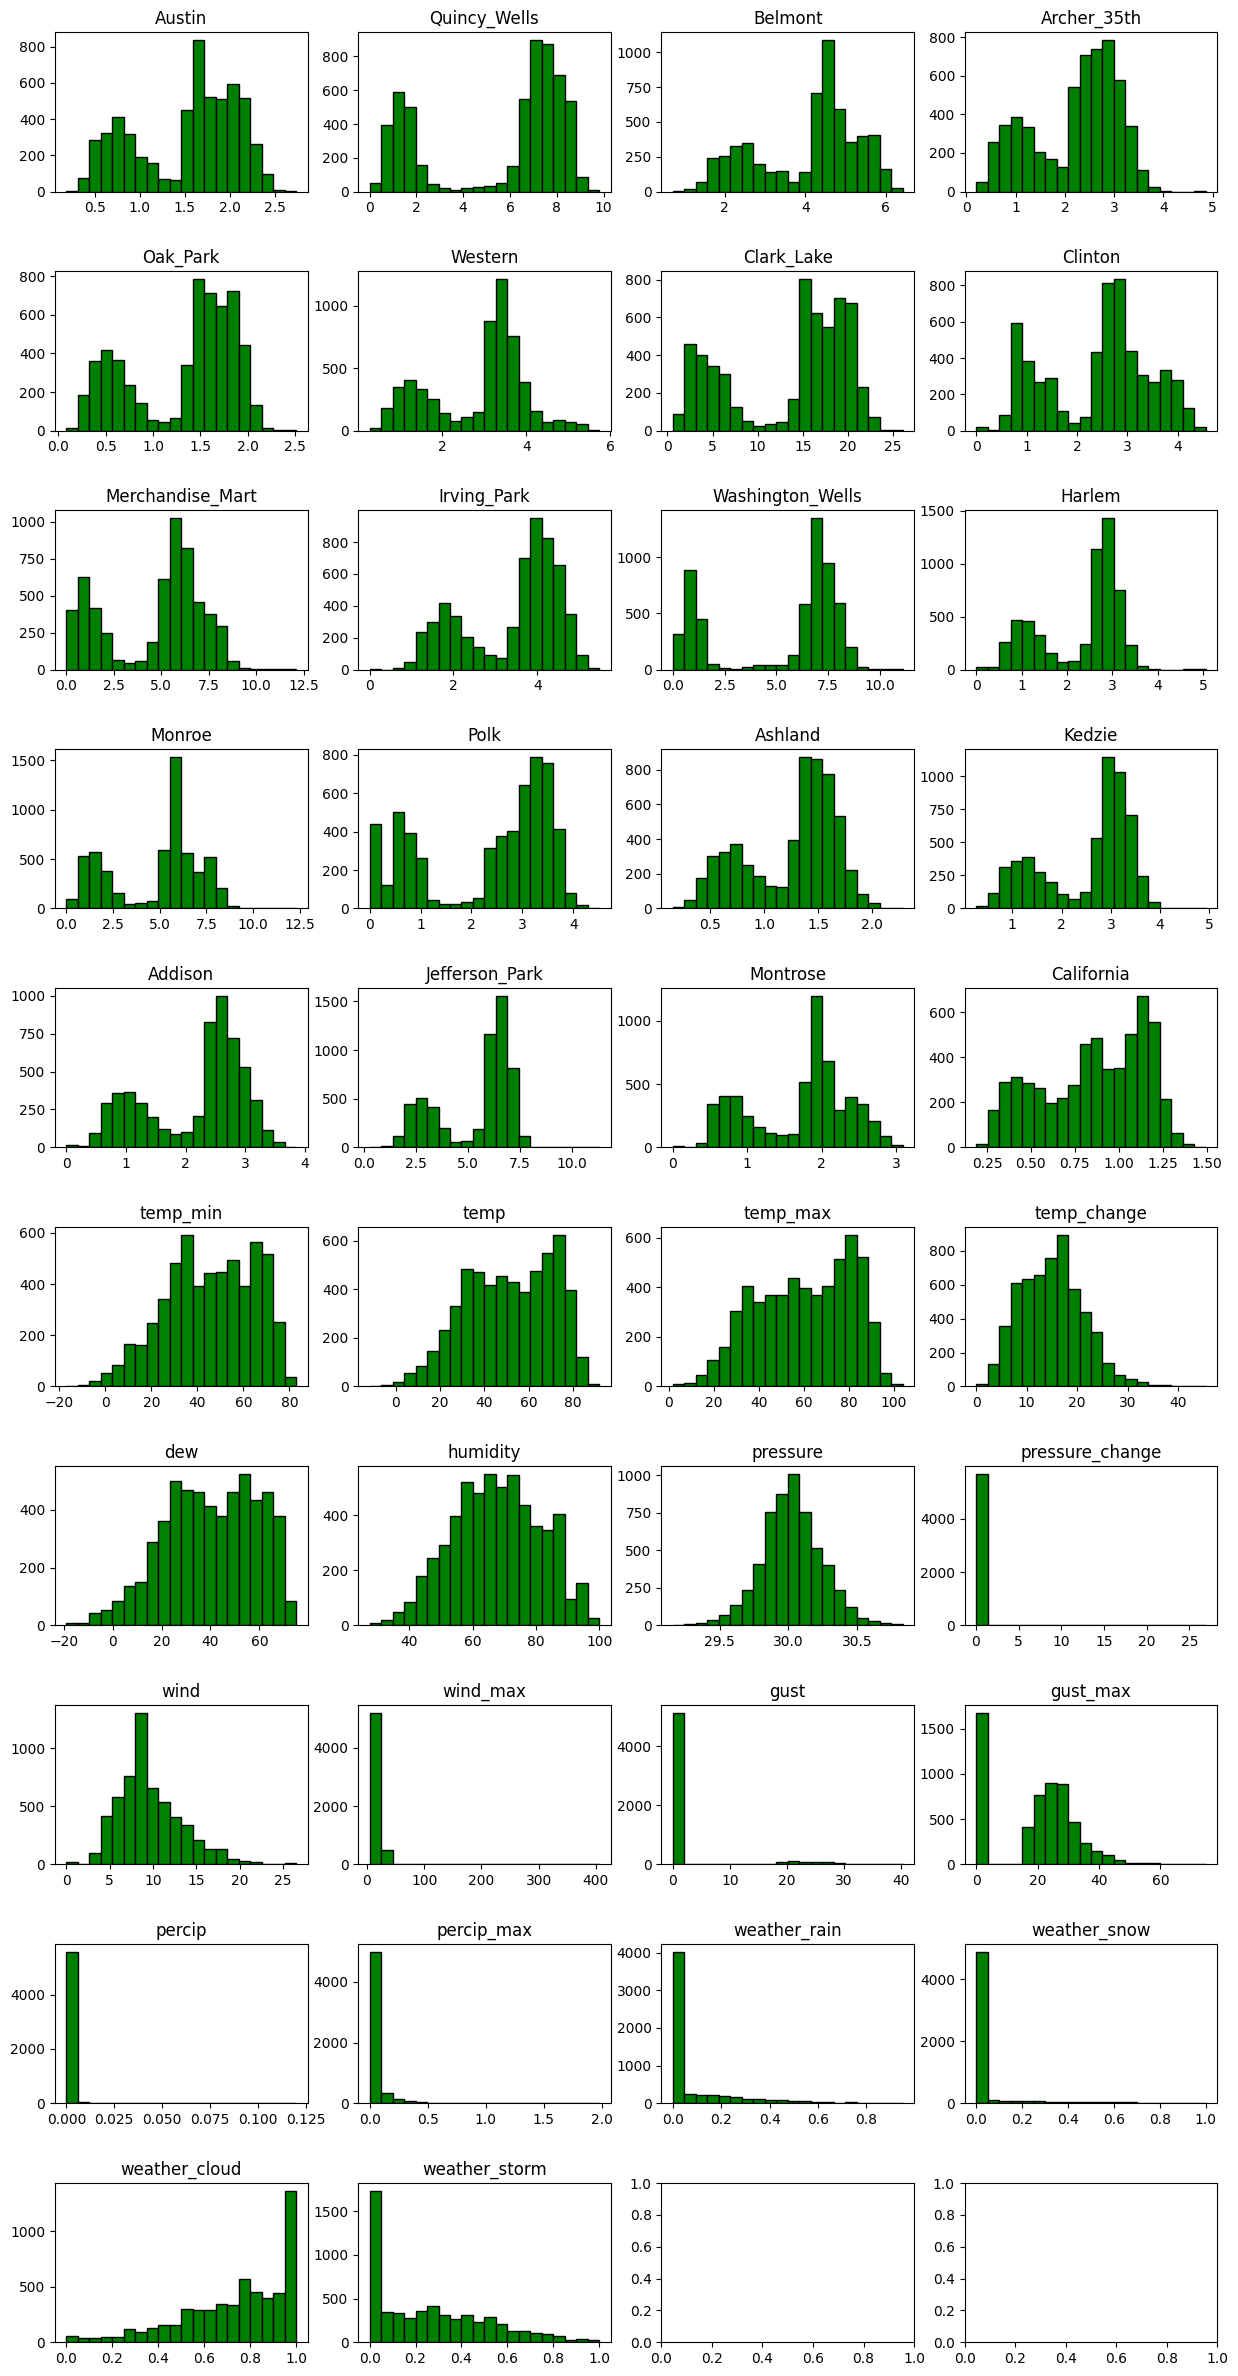

In [ ]:
hist_columns = chicago.columns[:-11]
histogram_df = chicago[hist_columns]

num_columns = histogram_df.shape[1]

#-- Calculate the number of rows and columns for subplots
num_rows = (num_columns - 1) // 4 + 1
num_cols = min(num_columns, 4)

#-- Plot histograms for each variable
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3*num_rows))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(histogram_df.columns):
    ax = axes[i // num_cols, i % num_cols]
    histogram_df[col].hist(ax=ax, bins=20, color='green', edgecolor='black')
    ax.set_title(col)
    ax.grid(False)

plt.show()

### **Interpreting the correlation matrix**

*   Positive correlation (*values greater than 0*)

We can immediately notice the cluster of red in the top left corner of our correlation matrix representing the different stations. This implies that the ridership in each station is strongly positevely correlated which is expected as all the stations are part of the same transport network and thus affluence in one is consistent with affluence in another.

Other positevely correlated variables are weather variables such as temp_min and temp_max which is logical.

Another interesting positve correlation is between the WhiteSox_Away, WhiteSox_Home and Cubs_Away, Cubs_Home variables. The WhiteSox and the Cubs are both baseball teams based in Chicago and probably share the same scheduling for their league games. We verified this in the **next cell**. Over 162 MLB games in the regular season played per year [(Wikipedia)](https://en.wikipedia.org/wiki/Major_League_Baseball_schedule#:~:text=The%20Major%20League%20Baseball%20(MLB,2%2C430%20games%2C%20plus%20the%20postseason.) and the 32 to 53 games played in the postseason[(Wikipedia)](https://en.wikipedia.org/wiki/Major_League_Baseball_postseason), the Cubs and WhiteSox play at home up to 174 times per year (see hidden cell below explaining the correlation of the WhiteSox and Cubs games).

*   Negative correlation (*values lesser than 0*)

We can see that mostly in weather variables, negative correlations exist. As an example, weather_snow is negatively correlated with temperature, which is expected.

We can also notice that WhiteSox_Away, WhiteSox_Home and Cubs_Away, Cubs_Home variables are negatively correlated with weather_snow because baseball games often get canceled or postponed on snowy days.

#### Explaining the correlation of the WhiteSox and Cubs games

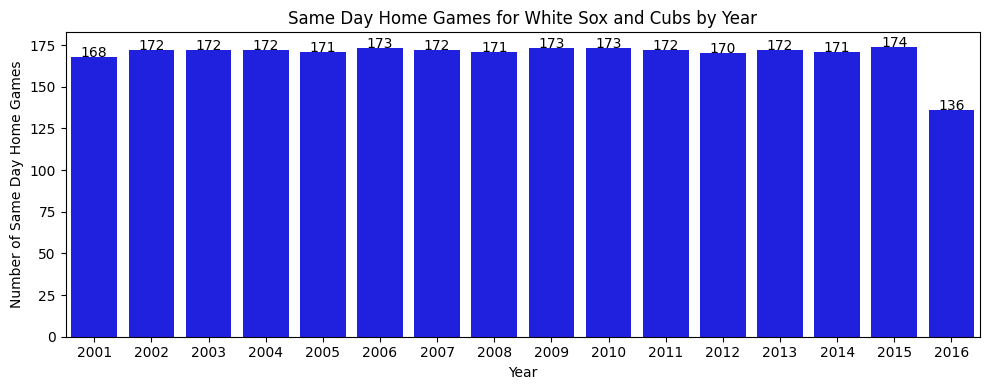

In [ ]:
# number of times the White Sox and Cubs had games at home on the same day
chicago['date'] = pd.to_datetime(chicago['date'])

df_bb = pd.DataFrame()
df_bb['Same_Day_Games'] = chicago['WhiteSox_Home'] & chicago['Cubs_Home']

df_bb['Year'] = chicago['date'].dt.year
yearly_data = df_bb.groupby("Year")['Same_Day_Games'].sum().reset_index()

plt.figure(figsize=(10,4))

ax = sns.barplot(x='Year', y='Same_Day_Games', data=yearly_data, color='blue')
ax.set(title='Same Day Home Games for White Sox and Cubs by Year', xlabel='Year', ylabel='Number of Same Day Home Games')

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()

### **Correlation Matrix**


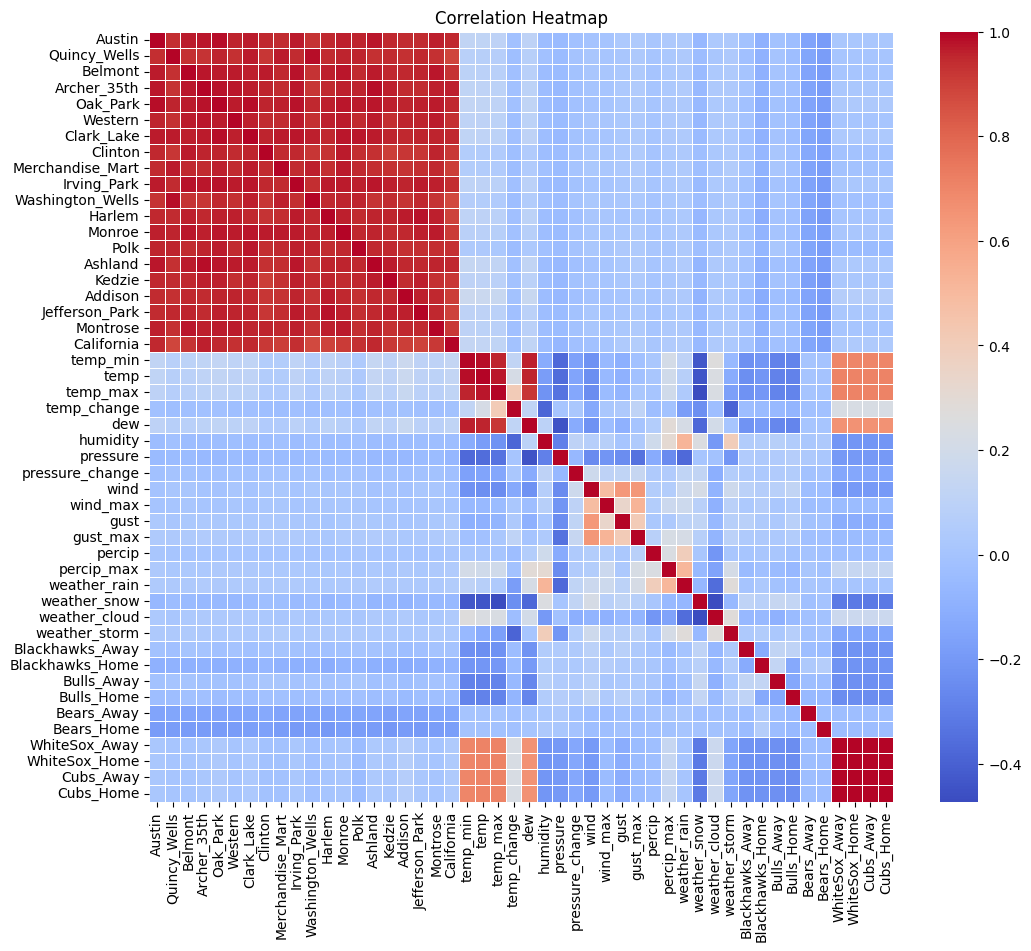

In [ ]:
#-- Calculate the correlation matrix
correlation_matrix = chicago.corr(numeric_only=True)

#-- Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### **Weekday vs weekend plot**
On this plot we can see that there is a difference in ridership values between weekdays and weekend, as weekdays tend to have more passengers. Plotted data shows the mean value for the weekday as well as for the weekend day. This plot also shows the difference among total ridership per station. The code after it shows the share of weekdays and weekends in total ridership as some stations are used a lot even during the weekend. Stations *Belmont* and *California* have almost 17% weekned share in total number of rides, which can be observed also on the plot.



In [ ]:
#-- Convert the 'date' column to a datetime
chicago['date'] = pd.to_datetime(chicago['date'])

#-- Create a new column 'day_of_week' to store the day of the week (0-6)
chicago['day_of_week'] = chicago['date'].dt.weekday

#-- Create a new column 'day_type' to label weekdays and weekends
chicago['day_type'] = chicago['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

#-- Now 'day_type' column will indicate whether each date is a weekday or weekend
# chicago.head

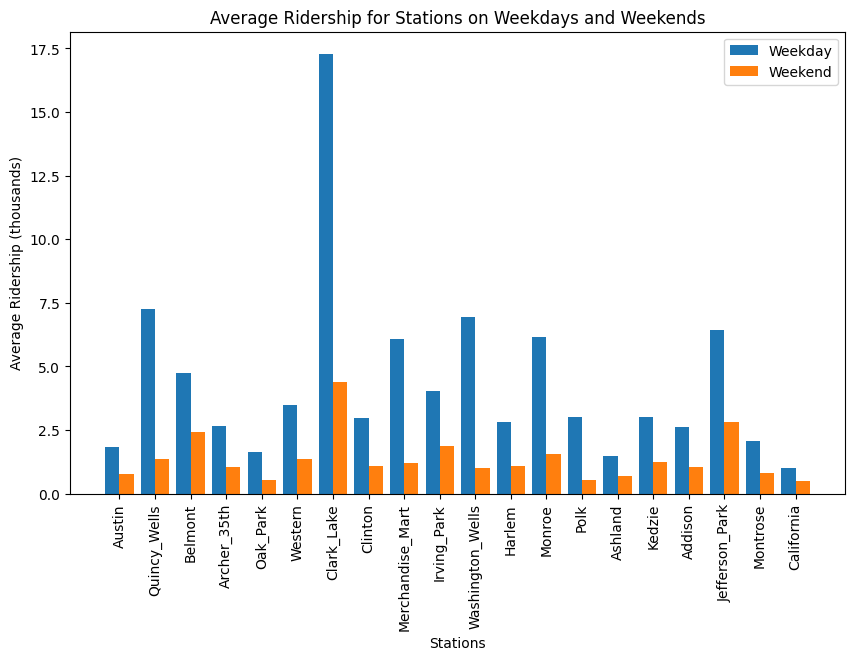

In [ ]:
#-- Weekday vs Weekend Ridership
stations = chicago.columns[:20]  # Exclude 'date', 'day_of_week', and 'day_type' columns

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Group and calculate the mean ridership for each station for weekdays and weekends
grouped_data = chicago.groupby(['day_type'])[stations].mean().T

x = range(len(grouped_data))
width = 0.4

# Create a bar chart for weekdays
ax.bar(x, grouped_data['Weekday'], width=width, align='center', label='Weekday')
# Create a bar chart for weekends with a slight offset
ax.bar([i + width for i in x], grouped_data['Weekend'], width=width, align='center', label='Weekend')

ax.set_title('Average Ridership for Stations on Weekdays and Weekends')
ax.set_xlabel('Stations')
ax.set_ylabel('Average Ridership (thousands)')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(stations, rotation=90)
ax.legend()

plt.show()


We can immediately notice that the average ridership in Clark/Lake station is remarkable during the weekdays and that comes from its central position in the L train network.

In [ ]:
# we need to check the distribution of our numerical variables. The date is always distributed the same

column_sums = chicago.sum()
total = pd.DataFrame({'Sum': column_sums}).T
stations = total.columns[:20]
total = total[stations]
sum_by_day_type = chicago.groupby('day_type').sum()
sum_by_day_type = sum_by_day_type[stations]
final_share = sum_by_day_type.loc['Weekday']/total
final_share = final_share.append(sum_by_day_type.loc['Weekend']/total)
final_share

<ipython-input-14-93e811bd08a3>:3: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_sums = chicago.sum()
<ipython-input-14-93e811bd08a3>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_by_day_type = chicago.groupby('day_type').sum()
<ipython-input-14-93e811bd08a3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_share = final_share.append(sum_by_day_type.loc['Weekend']/total)


,Austin,Quincy_Wells,Belmont,Archer_35th,Oak_Park,Western,Clark_Lake,Clinton,Merchandise_Mart,Irving_Park,Washington_Wells,Harlem,Monroe,Polk,Ashland,Kedzie,Addison,Jefferson_Park,Montrose,California
Sum,0.856,0.930259,0.830585,0.862969,0.879951,0.864159,0.90778,0.874602,0.92702,0.844526,0.94505,0.865563,0.907787,0.933653,0.840573,0.857064,0.862918,0.850902,0.861812,0.836475
Sum,0.144,0.069741,0.169415,0.137031,0.120049,0.135841,0.09222,0.125398,0.07298,0.155474,0.05495,0.134437,0.092213,0.066347,0.159427,0.142936,0.137082,0.149098,0.138188,0.163525


### **Ridership per day**

In this plot we can see that ridership correlates to the specific day of the week. Weekdays have similar distribution on all of the stations and average ridership tends to correlate between weekdays. We can also see that Sunday ridership has lowest value in all of the staions, as well as that Monday tends to be lower than all of the other weekdays.



<Figure size 1200x600 with 0 Axes>

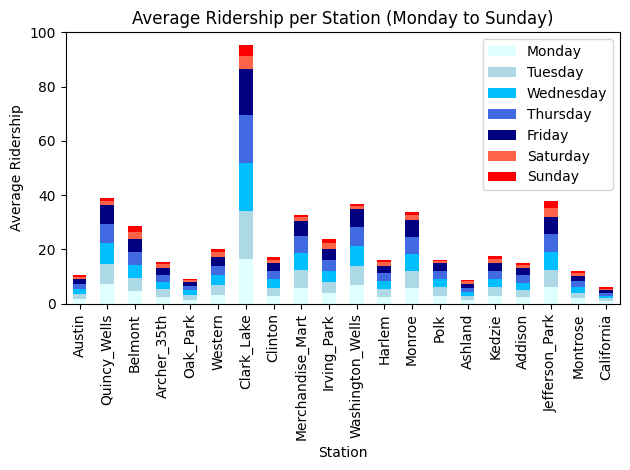

In [ ]:
#-- Now average ridership perday
stations = chicago.columns[:20]
average_ridership = chicago.groupby('day_of_week')[stations].mean()

#-- Transpose the DataFrame for better visualization
average_ridership = average_ridership.T

colors = ['lightcyan', 'lightblue', 'deepskyblue', 'royalblue', 'navy', 'tomato', 'red']

#-- Create a bar chart
plt.figure(figsize=(12, 6))
average_ridership.plot(kind='bar', stacked=True, color = colors)
plt.xlabel('Station')
plt.ylabel('Average Ridership')
plt.title('Average Ridership per Station (Monday to Sunday)')
plt.legend(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
average_ridership

day_of_week,0,1,2,3,4,5,6
Austin,1.725642,1.877160,1.875846,1.848072,1.805633,0.892472,0.643818
Quincy_Wells,7.142497,7.571383,7.482627,7.314396,6.851754,1.507923,1.218161
Belmont,4.513187,4.788050,4.821655,4.822675,4.835762,2.765982,2.084716
Archer_35th,2.544969,2.721706,2.738475,2.708198,2.625516,1.269381,0.848699
Oak_Park,1.538369,1.685138,1.669661,1.649092,1.604260,0.654779,0.456628
Western,3.300568,3.557860,3.577313,3.516382,3.415783,1.621918,1.108224
Clark_Lake,16.430041,17.731355,17.766697,17.547247,16.982821,4.954865,3.828332
Clinton,2.899848,3.043144,3.024660,3.001821,2.980619,1.133752,1.009748
Merchandise_Mart,5.919596,6.414410,6.353682,6.156722,5.466429,1.543765,0.842450
Irving_Park,3.792040,4.081778,4.122227,4.092471,4.080135,2.127917,1.585060


## **Ridership at one station Vs Weather**
We can assume that these plots do not show a lot about due to various reasons, but show other interesting insights. For instance, we can see that ridership value for the station *Harlem* is clustered in two groups corresponding to distinction between weekdays and weekend. On the other hand, if we plot station "California" for example, we do not see points getting clustered as this station has similar values for all days of the week. Therefore, it is hard define high correlation between weather and ridership on these plots. They also show variance of weather variables, so we can see that change in pressure is not high, thus all the values will be clustered among the small variance of pressure variable on the X axis.

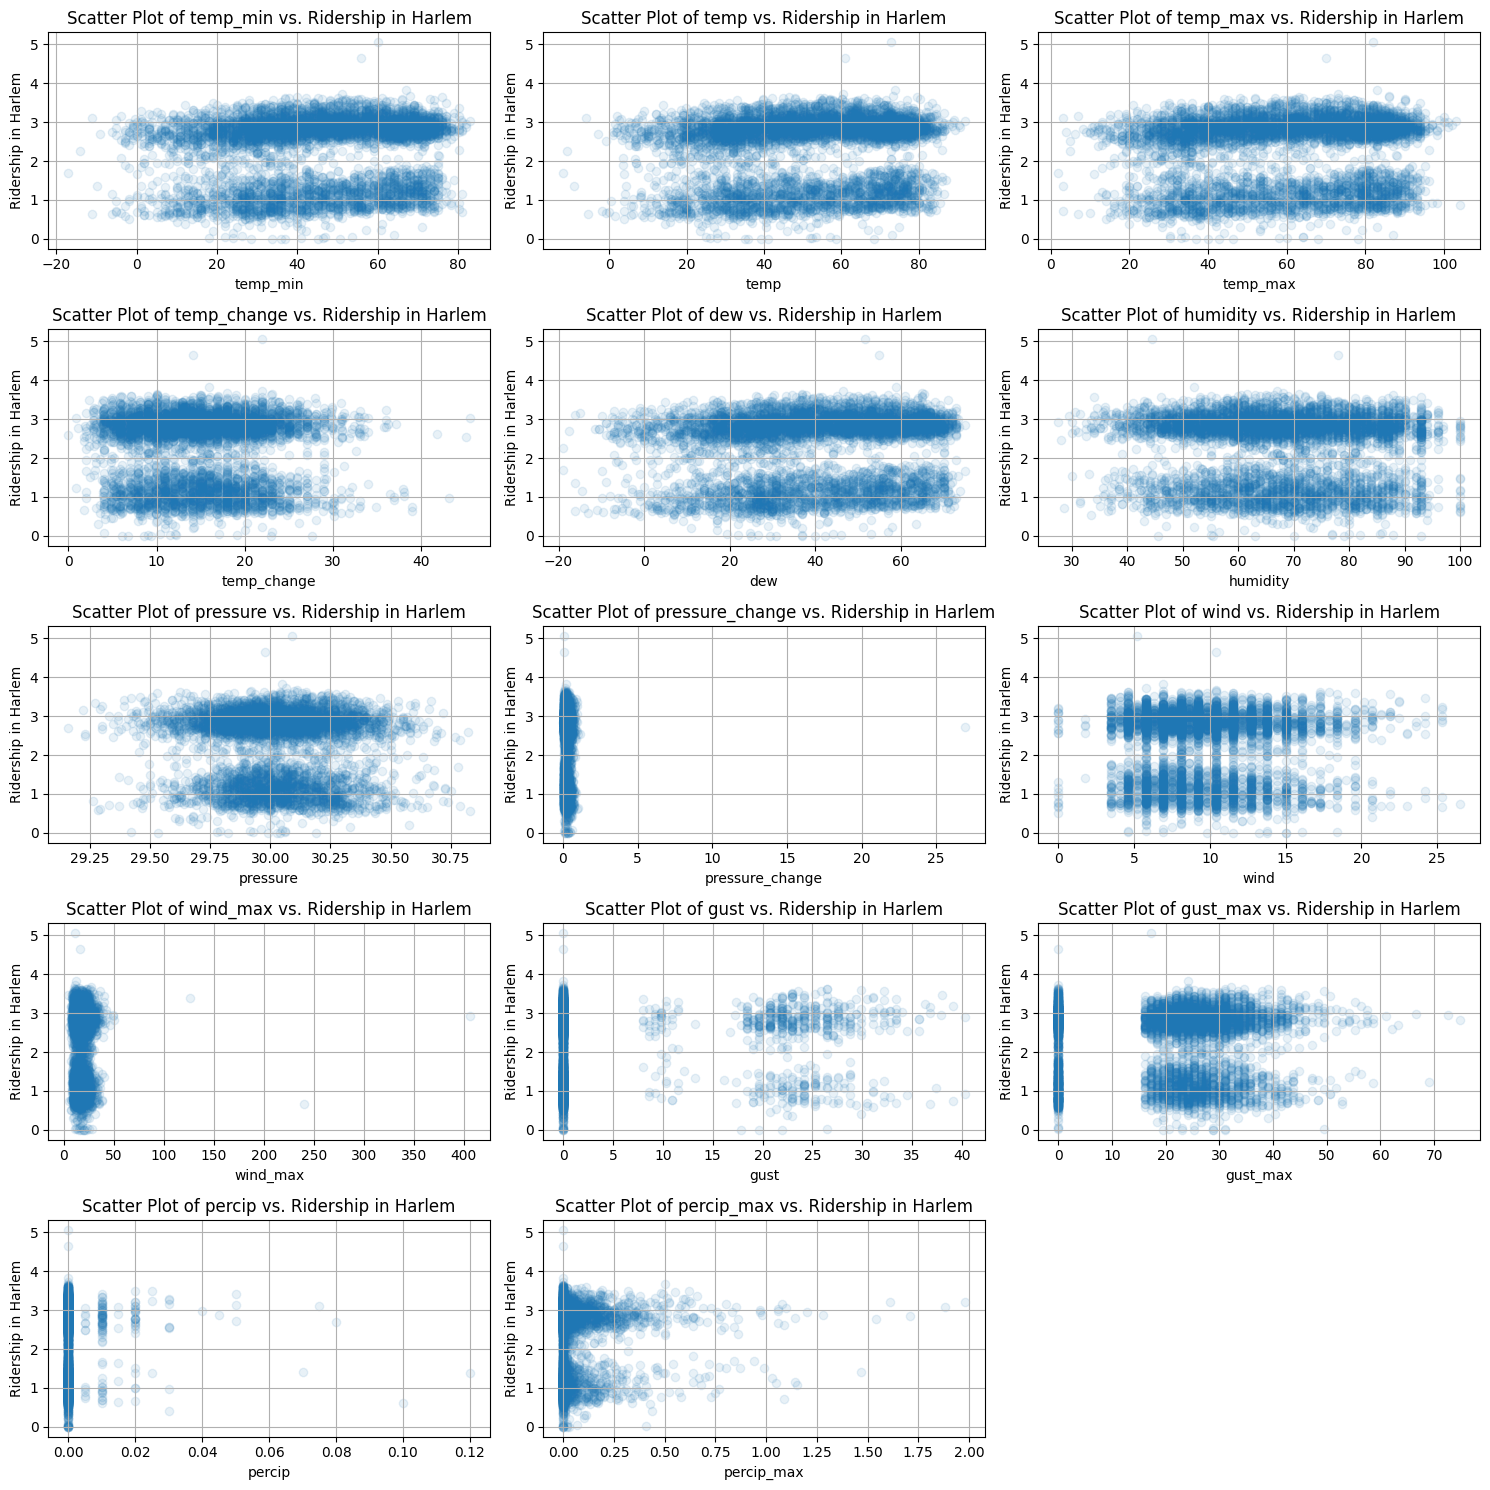

In [ ]:
#-- List of weather variables
weather_variables = ['temp_min', 'temp', 'temp_max', 'temp_change', 'dew', 'humidity', 'pressure', 'pressure_change', 'wind', 'wind_max', 'gust', 'gust_max', 'percip', 'percip_max']

#-- Define the number of columns for subplots
num_cols = 3

#-- Calculate the number of rows required for subplots
num_rows = (len(weather_variables) + num_cols - 1) // num_cols

#-- Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

#-- Flatten the axes for easier iteration
axes = axes.flatten()

#-- Iterate through each weather variable and create scatter plots
for i, weather_var in enumerate(weather_variables):
    ax = axes[i]
    ax.scatter(chicago[weather_var], chicago['Harlem'], alpha=0.1)
    ax.set_xlabel(weather_var)
    ax.set_ylabel('Ridership in Harlem')
    ax.set_title(f'Scatter Plot of {weather_var} vs. Ridership in Harlem')
    ax.grid(True)

#-- Remove any empty subplots
for i in range(len(weather_variables), num_rows * num_cols):
    fig.delaxes(axes[i])

#-- Adjust subplot layout
plt.tight_layout()

#-- Show the plot
plt.show()

## **Plot time series**

These time series show really important aspect of our data as its value change throughout the years.

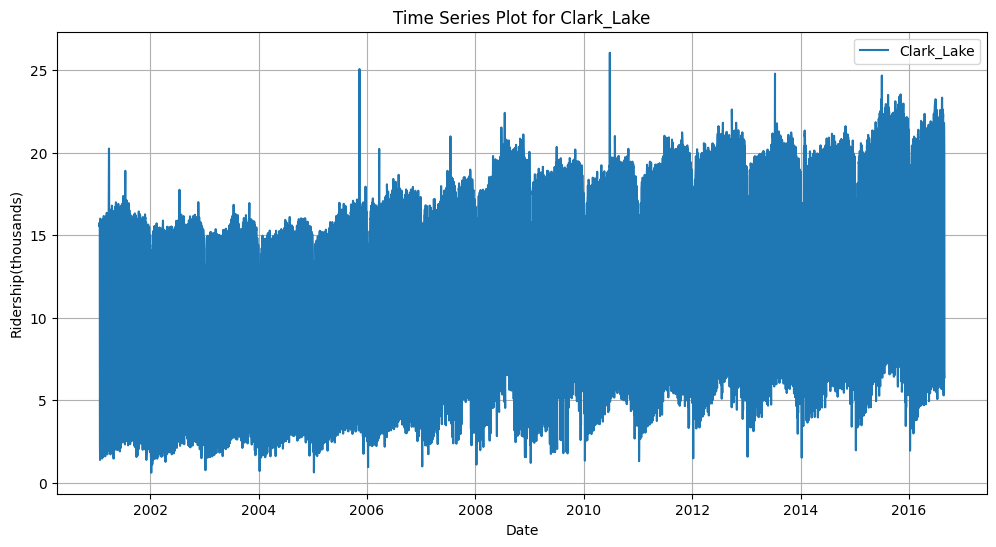

In [ ]:
# Set 'date' as the index (X-axis) for the time series data
chicago.set_index('date', inplace=True)
attribute_to_plot = 'Clark_Lake'

# Plot
plt.figure(figsize=(12, 6))
plt.plot(chicago.index, chicago[attribute_to_plot], label=attribute_to_plot)
plt.xlabel('Date')
plt.ylabel('Ridership(thousands)')
plt.title(f'Time Series Plot for {attribute_to_plot}')
plt.legend()
plt.grid(True)
plt.show()

### Weekly time series plot

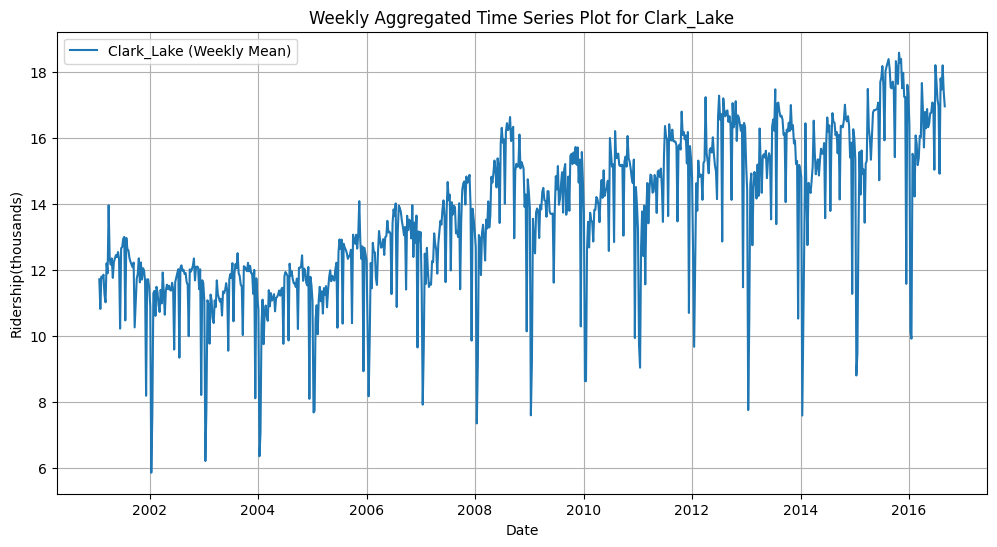

In [ ]:
# Resample weekly (W), mean as the aggregation function
weekly_data = chicago['Clark_Lake'].resample('W').mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data, label='Clark_Lake (Weekly Mean)')
plt.xlabel('Date')
plt.ylabel('Ridership(thousands)')
plt.title('Weekly Aggregated Time Series Plot for Clark_Lake')
plt.legend()
plt.grid(True)
plt.show()

### Weekly time series plot 12 years comparison

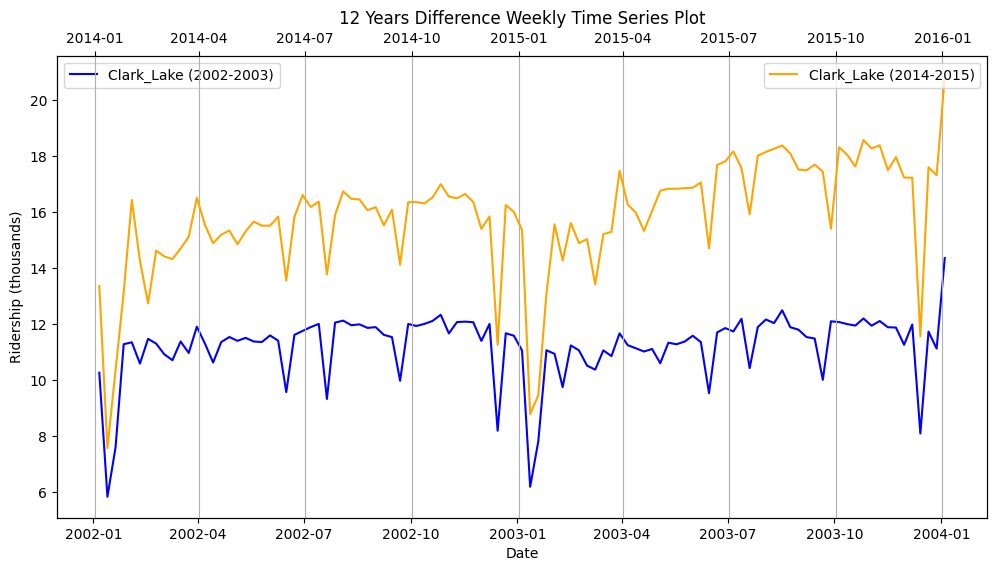

In [ ]:
# Show average weekly ridership first two and last two full years
chicago0203 = chicago.loc['2002-01-01':'2003-12-31']
chicago1415 = chicago.loc['2014-01-01':'2015-12-31']

weekly_data0203 = chicago0203['Clark_Lake'].resample('W').mean()
weekly_data1415 = chicago1415['Clark_Lake'].resample('W').mean()

# Create a figure with subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# First subplot
ax1.plot(weekly_data0203.index, weekly_data0203, label='Clark_Lake (2002-2003)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Ridership (thousands)')
ax1.set_title('12 Years Difference Weekly Time Series Plot')

# Second subplot sharing the x-axis with the first subplot
ax2 = ax1.twiny()

# Plot the second dataset on the second subplot
ax2.plot(weekly_data1415.index, weekly_data1415, label='Clark_Lake (2014-2015)', color='orange')
ax2.set_ylabel('Ridership (thousands)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True)
plt.show()

## **Normalization**

Considering that we have features with remarkably varying scales, we went with a mean-center normalization to standardize all variables to the same scale.

In [ ]:
from sklearn.preprocessing import StandardScaler

normalized = chicago.copy()

# Find non-numeric and categorical columns
ignore = normalized.columns.get_loc('Blackhawks_Away')
ignore_columns = normalized.columns[ignore:].tolist()
print("Columns to ignore:", ignore_columns)

# Select columns to normalize (excluding non-numeric columns like 'day_of_week' and 'day_type')
numeric_columns = normalized.select_dtypes(include=['number']).columns.difference(ignore_columns)
print("Numeric columns to normalize:", numeric_columns)

# Create a StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected numeric columns
normalized[numeric_columns] = scaler.fit_transform(normalized[numeric_columns])

Columns to ignore: ['Blackhawks_Away', 'Blackhawks_Home', 'Bulls_Away', 'Bulls_Home', 'Bears_Away', 'Bears_Home', 'WhiteSox_Away', 'WhiteSox_Home', 'Cubs_Away', 'Cubs_Home', 'date']
Numeric columns to normalize: Index(['Addison', 'Archer_35th', 'Ashland', 'Austin', 'Belmont', 'California',
       'Clark_Lake', 'Clinton', 'Harlem', 'Irving_Park', 'Jefferson_Park',
       'Kedzie', 'Merchandise_Mart', 'Monroe', 'Montrose', 'Oak_Park', 'Polk',
       'Quincy_Wells', 'Washington_Wells', 'Western', 'dew', 'gust',
       'gust_max', 'humidity', 'percip', 'percip_max', 'pressure',
       'pressure_change', 'temp', 'temp_change', 'temp_max', 'temp_min',
       'weather_cloud', 'weather_rain', 'weather_snow', 'weather_storm',
       'wind', 'wind_max'],
      dtype='object')


In [ ]:
normalized

,Austin,Quincy_Wells,Belmont,Archer_35th,Oak_Park,Western,Clark_Lake,Clinton,Merchandise_Mart,Irving_Park,Washington_Wells,Harlem,Monroe,Polk,Ashland,Kedzie,Addison,Jefferson_Park,Montrose,California,temp_min,temp,temp_max,temp_change,...,pressure,pressure_change,wind,wind_max,gust,gust_max,percip,percip_max,weather_rain,weather_snow,weather_cloud,weather_storm,Blackhawks_Away,Blackhawks_Home,Bulls_Away,Bulls_Home,Bears_Away,Bears_Home,WhiteSox_Away,WhiteSox_Home,Cubs_Away,Cubs_Home,day_of_week,day_type
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-22,-0.107909,0.956806,0.404434,-0.229010,0.177214,0.398529,0.298036,-0.037660,0.714494,0.292794,0.784760,0.386916,0.349843,0.130721,0.154624,0.540240,0.402502,0.660520,0.186190,-0.339283,-1.578619,-1.618563,-1.456930,-0.020594,...,1.878152,-0.249012,-1.196993,-0.847019,-0.321978,-1.388108,-0.108612,-0.332686,-0.522374,-0.337047,-0.112927,-1.064172,0,0,0,0,0,0,0,0,0,0,0,Weekday
2001-01-23,-0.033723,0.949940,0.504607,-0.138158,0.191615,0.420775,0.322275,-0.038627,0.712915,0.388824,0.790214,0.506547,0.493818,0.095187,0.142700,0.547904,0.486929,0.745302,0.305106,-0.253857,-1.060252,-1.059665,-1.168205,-0.651462,...,0.769424,-0.090698,-0.412408,-0.711593,-0.321978,-1.388108,-0.108612,-0.332686,-0.522374,-0.337047,1.123661,-0.216670,0,0,0,1,0,0,0,0,0,0,1,Weekday
2001-01-24,-0.008994,0.952686,0.472011,-0.115157,0.297829,0.437683,0.297579,-0.072476,0.684493,0.395872,0.805210,0.539588,0.397975,0.166254,0.166547,0.506298,0.507433,0.863997,0.398432,-0.147929,-1.374414,-1.336574,-1.509863,-0.829399,...,0.630833,0.041230,0.209849,0.285638,-0.321978,-1.388108,-0.108612,-0.332686,-0.522374,0.997991,-1.601880,-0.773600,0,0,1,0,0,0,0,0,0,0,2,Weekday
2001-01-25,-0.060218,0.778621,0.539588,-0.048456,0.220419,0.434124,0.326086,-0.026055,0.717652,0.380014,0.717957,0.565793,0.471018,0.106242,0.228550,0.540240,0.436273,0.889158,0.401443,-0.270942,-1.578619,-1.466136,-1.601293,-0.505877,...,1.924349,-0.143469,0.047521,-0.145264,-0.321978,-1.388108,-0.108612,-0.332686,-0.522374,-0.337047,-1.879481,-0.894671,0,0,0,0,0,0,0,0,0,0,3,Weekday
2001-01-26,-0.049620,0.699314,0.500632,-0.172658,0.166412,0.355815,0.304286,-0.025088,0.444880,0.410849,0.624228,0.474646,0.390797,0.203367,0.240473,0.619072,0.471250,0.839383,0.362306,-0.226521,-1.269693,-1.234956,-1.360689,-0.651462,...,-0.524092,1.149427,0.832106,0.285638,-0.321978,0.459752,-0.108612,-0.332686,-0.522374,2.878527,-1.201352,0.772994,0,0,0,0,0,0,0,0,0,0,4,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-24,1.029609,1.107868,1.206609,0.918712,1.080932,0.882618,1.247287,1.373339,1.643341,0.512165,1.256472,0.832398,1.460689,0.734001,0.753183,1.046081,1.056209,0.962454,1.346750,1.106124,1.400679,1.175926,1.184904,-0.344116,...,-0.177615,-0.011541,0.507450,0.002474,-0.321978,0.459752,-0.108612,0.599369,0.905023,-0.337047,0.181499,0.743833,0,0,0,0,0,0,1,1,1,1,2,Weekday
2016-08-25,1.006647,1.064610,1.266235,1.019914,1.183545,0.856812,1.198963,1.496160,1.471230,0.306009,1.162402,0.824423,1.584398,0.720578,0.970191,0.991336,0.998316,0.970658,1.397929,0.996779,1.453040,1.277543,1.184904,-0.505877,...,-0.246910,-0.275397,-0.737064,-0.711593,-0.321978,-1.388108,-0.108612,0.055670,0.976393,-0.337047,0.134391,0.427432,0,0,0,0,0,0,1,1,1,1,3,Weekday
2016-08-26,0.550933,0.746349,0.994339,0.718608,0.582267,0.556036,0.914661,1.165412,1.030689,0.136855,0.855313,0.452998,1.198494,0.420517,0.490867,0.713233,1.001934,0.707014,1.161602,0.552564,1.191238,1.175926,0.900991,-0.651462,...,0.330552,-0.275397,-1.034665,-0.847019,-0.321978,-1.388108,-0.108612,-0.332686,-0.522374,-0.337047,1.123661,0.122331,0,0,0,0,0,0,1,1,1,1,4,Weekday


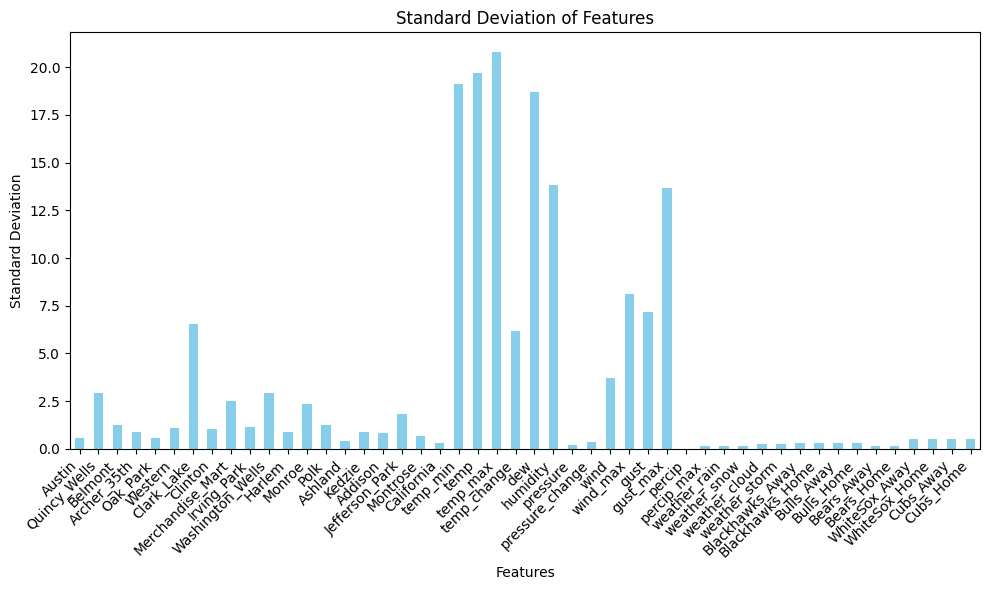

In [ ]:
pd.set_option('display.max_columns', 49)
chi_format = chicago.describe().apply(lambda x: round(x, 2))
chi_format
# Extract the standard deviation row
std_deviation = chi_format.loc['std']

# Plotting
plt.figure(figsize=(10, 6))
std_deviation.plot(kind='bar', color='skyblue')
plt.title('Standard Deviation of Features')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

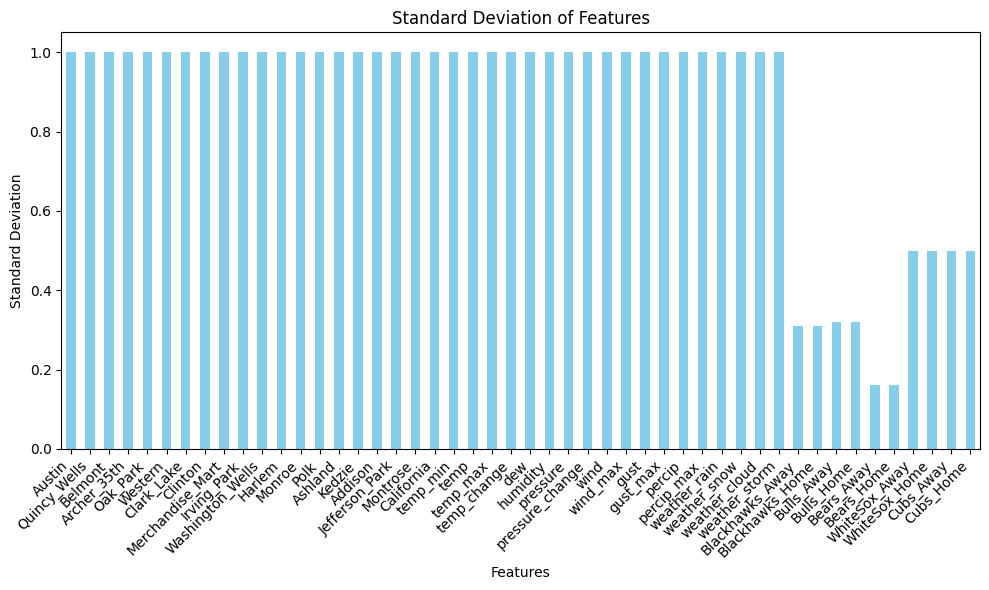

In [ ]:
norm_format = normalized.describe().apply(lambda x: round(x, 2))
norm_format
# Extract the standard deviation row
std_deviation = norm_format.loc['std']

# Plotting
plt.figure(figsize=(10, 6))
std_deviation.plot(kind='bar', color='skyblue')
plt.title('Standard Deviation of Features')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

## **Splitting the data**
Splitting the data into train and test is done using the ***scikit-learn library***

***X*** represents the features (independent variables) of the dataset, and it is created by excluding the 'Clark_Lake' column from the original.

Meanwhile, ***y*** represents the target variable (dependent variable), and it is assigned the values of the 'Clark_Lake' column.


In [ ]:
from sklearn.model_selection import train_test_split

# drop our target feature
X = normalized.drop(columns=['Clark_Lake', 'day_type'])
y = normalized['Clark_Lake']

# sort the dataset by date
normalized = normalized.sort_index()
# choose dates for splitting the data
total_samples = len(normalized) - 1 # removing header
train_start = pd.to_datetime('2001-01-21')
train_end = pd.to_datetime('2011-12-31')
validate_start = pd.to_datetime('2012-01-01')
validate_end = pd.to_datetime('2014-03-31')
test_start = pd.to_datetime('2014-04-01')
test_end = pd.to_datetime('2016-08-29')

# calculate training, validation and testing subsets
train_size = (train_end - train_start).days
validate_size = (validate_end - validate_start).days
test_size = (test_end- test_start).days

train_percentage = (train_end - train_start).days / total_samples
validate_percentage = (validate_end - validate_start).days / total_samples
test_percentage = (test_end- test_start).days / total_samples

# split the data into training, validation_testing sets
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, train_size=train_percentage, shuffle=False)
# split the validation_testing into validation, and testing sets
X_validate, X_test, y_validate, y_test = train_test_split(X_valid_test, y_valid_test, test_size=validate_percentage+test_percentage, shuffle=False)


print(f"Training sample ratio ({round(train_percentage*100,2)}%)")
print(f"Validation sample ratio ({round(validate_percentage*100,2)}%)")
print(f"Testing sample ratio ({round(test_percentage*100,2)}%)")
# print(train_percentage+validate_percentage+test_percentage)

Training sample ratio (70.14%)
Validation sample ratio (14.39%)
Testing sample ratio (15.46%)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_validate shape:", X_validate.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_train shape:", y_train.shape)

X_train shape: (3996, 48)
X_validate shape: (1193, 48)
X_test shape: (509, 48)
y_test shape: (509,)
y_train shape: (3996,)


## **Evaluation metrics**
The evaluation metrics we are going to implement are the ***Mean Absolute Error*** and the ***Mean Squared Error*** since ours is a regression problem.

# **Linear Regression**

We chose to start with a simpler approach by doing a linear regression on the train, validation and test data.

In [ ]:
# Linear model
from sklearn.linear_model import LinearRegression
reg_linear = LinearRegression()
reg_linear = reg_linear.fit(X_train,y_train)

# Linear regression predictor
pred_linear = reg_linear.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print('MAE LinearRegressor:', mean_absolute_error(y_test, pred_linear))
print('MSE LinearRegressor:', mean_squared_error(y_test, pred_linear))

MAE LinearRegressor: 0.10083144225232599
MSE LinearRegressor: 0.02034480161979953


# **Ridge regression**

After establishing that our exploratory variables are **correlated**, we chose the **Ridge regression** as our regularization term. According to the sklearn ridge documentation, the `L2 norm` is added to the cost function.

$$J(\beta, \lambda) = \frac{1}{2m} \sum_{i=1}^{m} \left(f(\beta, x_i) - y_i\right)^2 + \frac{\lambda}{2m} \sum_{j=1}^{d} \beta_j^2 $$

The equation above is the ridge regularization for a linear regression adapted from **Charlotte Pelletier's Lecture on Regularization** where;

- $J(β,λ)$ represents the Ridge Regression objective function.
- $\frac{1}{2m} \sum_{i=1}^{m} (f(β, x_i) - y_i)^2$ is the mean squared error term.
- $\frac{\lambda}{2m} \sum_{j=1}^{d} β_j^2$ is the L2 regularization term, where $ λ $ is the regularization parameter, $ m $ is the number of data points, $ d $ is the number of features, $ β $ is the vector of model coefficients, $ x_i $ is a data point, and $ y_i $ is the target value.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
search = GridSearchCV(estimator=ridge, param_grid={'alpha': np.logspace(-5,8,100)}, scoring='neg_mean_squared_error',
                      n_jobs=1, refit=True, cv=10)

In the code above we are doing a hyperparameter tuning for alpha $({\alpha})$ by setting up a grid seach and using the `ridge` model as an estimator. We specified ${\alpha}$ as the hyperparameter we want to tune using `param_grid`between the log values of -5 and 8 using 100 values which we chose arbitrarily because these parameters were best fitting our data. Also, we are searching for a hyperparameter that minimizes the `'neg_mean_squared_error'`. We set the `refit` to `True`for the best model to be fit on our training data. Finally, we set the number of cross validations to `10`. The plot below visualizes this

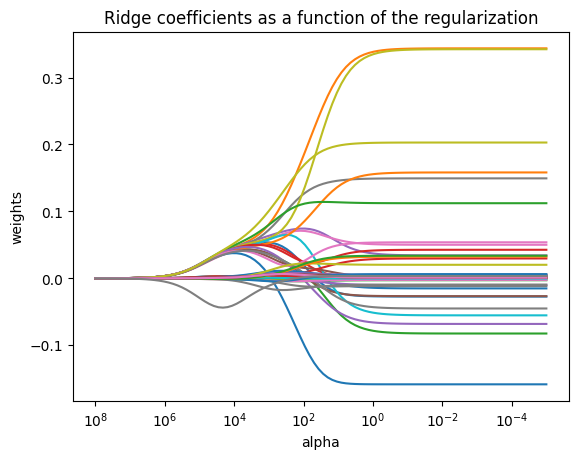

In [ ]:
n_alphas = 100
alphas = np.logspace(-5, 8, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [ ]:
search.fit(X_train, y_train)
search.best_params_

{'alpha': 8.11130830789689}

The result above shows the most approriate  ${\alpha}$ = `36.78` for our model and we can also find the mean square error we will obtain if we use this $({\alpha})$

In [ ]:
search.best_score_

-0.013160202068376207

Below we now fit our model with the  hyperparameter above and train and test our model. We will compare whether the result of our mean squared error matches the result provided above by the `search.best_score_`

In [ ]:
#-- implementing the ridge regression on our dataset

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge(alpha= 36.783797718286415) #alpha value from the hyperparameter tuning above
ridge.fit(X_train, y_train)

Ridge(alpha=36.783797718286415)

## **Justification of parameters**

Other than ${\alpha}$, we set all the other parameters to default

In [ ]:
ridge.get_params(deep=True)

{'alpha': 36.783797718286415,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [ ]:
y_pred = ridge.predict(X_test)

In [ ]:
print('MAE Ridge Regressor:', mean_absolute_error(y_test, y_pred))
print('MSE Ridge Regressor:', mean_squared_error(y_test, y_pred))

MAE Ridge Regressor: 0.08454828831941792
MSE Ridge Regressor: 0.012448347027402466


From this results we see that the value of the mean squared error does not match the value of the mean square error by the `search.best_score_`

The non-penalized model had an MSE of 0.020 while the non-penalized model only improved the MSE by 0.008 which is not significant.

## **Coefficients for the exploratory variables**

We compared the Coefficients of the variables from the 2 models in order to see the variables that were penalized

In [ ]:
coef_dict_linear = {}
for coef, feat in zip(reg_linear.coef_, normalized.columns):
  coef_dict_linear[feat] = coef
coef_dict_linear

{'Austin': -0.027395669330190754,
 'Quincy_Wells': 0.3437269781733596,
 'Belmont': -0.08256606725630206,
 'Archer_35th': 0.001952575820226808,
 'Oak_Park': 0.034193206468387985,
 'Western': -0.02670927347362749,
 'Clark_Lake': 0.050062760779585366,
 'Clinton': 0.14935403727369834,
 'Merchandise_Mart': 0.34235763056402696,
 'Irving_Park': -0.055409455390226105,
 'Washington_Wells': -0.15851246296774543,
 'Harlem': 0.15820271452330203,
 'Monroe': 0.11220420792999942,
 'Polk': 0.042603732069683015,
 'Ashland': -0.0682426509475893,
 'Kedzie': 0.0020539354437618712,
 'Addison': 0.053782013686097495,
 'Jefferson_Park': -0.04515293924444193,
 'Montrose': 0.2029177914823463,
 'California': 0.00159491659513178,
 'temp_min': -0.015151540208485713,
 'temp': 0.0005958573868687988,
 'temp_max': -0.002924301697243576,
 'temp_change': 0.02961987608015031,
 'dew': -0.010286331295580828,
 'humidity': 0.0019353334590491357,
 'pressure': -0.00027109092069843414,
 'pressure_change': -0.009384080081716085,

In [ ]:
coef_dict_ridge = {}
for coef, feat in zip(ridge.coef_, normalized.columns):
  coef_dict_ridge[feat] = coef
coef_dict_ridge

{'Austin': -0.004026920106959218,
 'Quincy_Wells': 0.2410680229072447,
 'Belmont': -0.015772656862502468,
 'Archer_35th': 0.011029001584290992,
 'Oak_Park': 0.06993029207348692,
 'Western': -0.011365130837260214,
 'Clark_Lake': 0.06616903093482927,
 'Clinton': 0.1388828428797778,
 'Merchandise_Mart': 0.2003683951718214,
 'Irving_Park': 0.02001412506590679,
 'Washington_Wells': -0.13561608875962317,
 'Harlem': 0.10900019687150114,
 'Monroe': 0.1140057663879831,
 'Polk': 0.024316823525016996,
 'Ashland': -0.025471934606971933,
 'Kedzie': 0.01300691307749196,
 'Addison': 0.038748108709963446,
 'Jefferson_Park': -0.008977938481564137,
 'Montrose': 0.18731296446950868,
 'California': 0.0022729773561341073,
 'temp_min': -0.003919930412089437,
 'temp': 0.0009043654234697437,
 'temp_max': -0.003982024646873346,
 'temp_change': 0.014312971294488795,
 'dew': -0.005276178739818602,
 'humidity': 0.0016017123695543818,
 'pressure': 0.0002788967680846727,
 'pressure_change': -0.012470869482404574,
 

The coefficient values from the 2 models are not the same therefore meaning that the penalization had an impact on our dataset

In [ ]:
#select the features with the heighest coefficients
#######################
coef_difference = {}

# Iterate through the keys in one of the dictionaries (e.g., coef_dict_linear)
for key in coef_dict_linear:
    coef_difference[key] = coef_dict_ridge[key] - coef_dict_linear[key]

# print differences dict
print(coef_difference)

top_features = sorted(coef_difference, key=coef_difference.get, reverse=True)[:5]

# output top 5 keys and their corresponding values
print('The features that are most penalized by the model ')
for key in top_features:
    print(f"Key: {key}, Value: {coef_difference[key]}")

{'Austin': 0.023368749223231535, 'Quincy_Wells': -0.10265895526611493, 'Belmont': 0.06679341039379959, 'Archer_35th': 0.009076425764064184, 'Oak_Park': 0.03573708560509893, 'Western': 0.015344142636367276, 'Clark_Lake': 0.016106270155243907, 'Clinton': -0.010471194393920524, 'Merchandise_Mart': -0.14198923539220557, 'Irving_Park': 0.0754235804561329, 'Washington_Wells': 0.022896374208122267, 'Harlem': -0.04920251765180089, 'Monroe': 0.0018015584579836735, 'Polk': -0.018286908544666018, 'Ashland': 0.04277071634061737, 'Kedzie': 0.010952977633730088, 'Addison': -0.01503390497613405, 'Jefferson_Park': 0.03617500076287779, 'Montrose': -0.015604827012837608, 'California': 0.0006780607610023272, 'temp_min': 0.011231609796396275, 'temp': 0.0003085080366009449, 'temp_max': -0.0010577229496297703, 'temp_change': -0.015306904785661515, 'dew': 0.0050101525557622265, 'humidity': -0.00033362108949475393, 'pressure': 0.0005499876887831068, 'pressure_change': -0.003086789400688489, 'wind': -0.0005375

## **Best model configurations**

We established the values of the slope and intercept for our model as follows:

In [ ]:
print("Slope: % .2f" % ridge.coef_[0])

Slope: -0.00


In [ ]:
print("Intercept: % .2f" % ridge.intercept_)

Intercept: -0.00


# **Random Forest**
Our parameters of interest are: `n_estimators` and `max_features`

- "n_estimators" defines the number of decision trees in the Random Forest ensemble. It impacts model performance and computational complexity, with more trees generally improving performance.
- "max_features" controls how many features each tree considers when splitting. It introduces diversity in the model and helps prevent overfitting. (Breiman et al, 1984)



*The following code is inspired by the practical sessions delivered by Prof Audrey Poterie*

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#--At first we are just testing a Random Forest model using default hyperparameters before fine-tuning

chicago_rfr = RandomForestRegressor(n_estimators=100, max_features='sqrt',oob_score=True,random_state=0)
chicago_rfr.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', oob_score=True, random_state=0)

In [ ]:
pred_chicago_rfr = chicago_rfr.predict(X_test)
print('MAE RFRegressor:', round(mean_absolute_error(y_test, pred_chicago_rfr),3))
print('MSE RFRegressor:', round(mean_squared_error(y_test, pred_chicago_rfr),3))

MAE RFRegressor: 0.19
MSE RFRegressor: 0.047


In [ ]:
#print('Out-of-bag error:',round(1-chicago_rfr.oob_score_,3))

# Obtain the OOB error
oob_error = 1 - chicago_rfr.oob_score_

# Print the OOB error
print(f'OOB error: {oob_error:.3f}')

OOB error: 0.008


we used the `OOB error` metric to estimate the performance of our `chicago_rfr` regressor

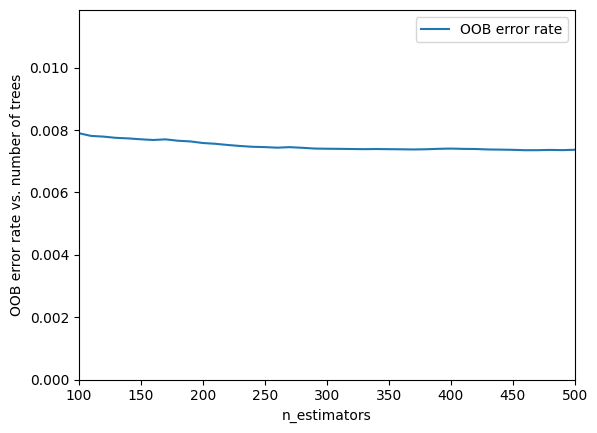

In [ ]:
#-- We want to determine the most suitable number of n_estimators value using the OOB error
#-- Adapted from Lab 2 of ensemble models by Prof. Audrey Poterie

RANDOM_STATE = 0

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = []

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 500
step=10

for i in range(min_estimators, max_estimators+1, step):
    chicago_rfr = RandomForestRegressor(warm_start=True, n_estimators=i, max_features='sqrt',random_state=RANDOM_STATE, oob_score=True)
    chicago_rfr.fit(X_train, y_train)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - chicago_rfr.oob_score_
    error_rate.append(oob_error)


# Plot Generate the "OOB error rate" vs. "n_estimators" plot

plt.plot(range(min_estimators, max_estimators +1, step), error_rate, label="OOB error rate")

plt.ylim(0, 1.5*max(error_rate))
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate vs. number of trees")
plt.legend(loc="upper right")
plt.show()

The error rate starts becoming constant after the 250 mark on the `n_estimators`

In [ ]:
# Also adapted from Lab 2 of ensemble models by Prof. Audrey Poterie
# max_features
grid = {
    'max_features':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}

# Step 2: use the grid to to search for the best couple of parameters
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(n_estimators=250) # create the forest model to tune

B=10
results_cv=pd.DataFrame()
for i in range(B):

    rf_cv = GridSearchCV(estimator=rf,param_grid=grid, cv=3,n_jobs=-1)# Search the best values for the parameters using 3-fold cross validation, and use all available cores(n_jobs=-1)
    rf_cv.fit(X_train, y_train) # Fit the CV search
    if i==0:
        results_cv=pd.DataFrame(rf_cv.cv_results_)[["params","mean_test_score","std_test_score"]]
    else:
        results_cv["mean_test_score"]=results_cv["mean_test_score"]+pd.DataFrame(rf_cv.cv_results_)["mean_test_score"]
        results_cv["std_test_score"]=results_cv["std_test_score"]+pd.DataFrame(rf_cv.cv_results_)["std_test_score"]



results_cv["mean_test_score"]=results_cv["mean_test_score"]/B
results_cv["std_test_score"]=results_cv["std_test_score"]/B


# Step 3: get the best parameters (with the higher performance)
ind_best=results_cv["mean_test_score"].idxmax()
print(results_cv["params"].iloc[ind_best])
print(results_cv["mean_test_score"].iloc[ind_best])
print(results_cv["std_test_score"].iloc[ind_best])
print(round(results_cv,4))

In [ ]:
#-- Below is our random forest algorithm with the tuned hyperparameters from the calculations above
chicago_opt_rf = RandomForestRegressor(n_estimators=250, max_features=0.8, random_state=0)
chicago_opt_rf.fit(X_train, y_train)

In [ ]:
pred_chicago_opt_rf = chicago_opt_rf.predict(X_test)
print('MAE OptimizedRFRegressor:', round(mean_absolute_error(y_test, pred_chicago_opt_rf),3))
print('MSE OptimizedRFRegressor:', round(mean_squared_error(y_test, pred_chicago_opt_rf),3))

# **Feature Importance**

We chose to use two methods to calculate feature importance from our `chicago_opt_rf` model. The two metrics are:
- Mean Decrease Impurity (MDI)
- Mean Decrease of Accuracy (MDA)

We wanted to see whether the two methods would rank our features in a similar manner and we explain our results below

## **Mean Decrease in Impurity (MDI)**
According to the sklean documentation, MDI quantifies importance by calculating the reduction in impurity within the trees. Features with higher MDI scores show the the feature's ability in the model to distinguish variables

In [ ]:
imp_feat = pd.DataFrame(zip(X_train.columns, chicago_opt_rf.feature_importances_),columns = ["feature", "importance"])
imp_feat.set_index("feature", inplace=True)
imp_feat.sort_values(by = "importance", ascending = False, inplace = True)
print(imp_feat.head())

top_15_feat = imp_feat.nlargest(15, 'importance')
top_15_feat.plot.barh(title="Random Forest Feature Importances (MDI)", color='darkblue', edgecolor='black', lw=.5, width=0.8).invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

## **Mean Decrease in Accuracy (MDA)**
The MDA calculates the feature importance by measuring how much a specific feature's random permutation impacts the model's accuracy.

In [ ]:
baseline_accuracy = chicago_opt_rf.score(X_test, y_test)

feature_importance = {}
for feature in X.columns:
    permuted_X_test = X_test.copy()
    permuted_X_test[feature] = np.random.permutation(permuted_X_test[feature])
    permuted_accuracy = chicago_opt_rf.score(permuted_X_test, y_test)
    mda = baseline_accuracy - permuted_accuracy
    feature_importance[feature] = mda

top_features = pd.Series(feature_importance).sort_values(ascending=False)
print(top_features.head())
top_features.nlargest(15).plot.barh(title="Random Forest Feature Importances (MDA)", color='darkgreen', edgecolor='black', lw=.5, width=0.8).invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()

Using the both MDI and MDA to calculate the feature importance, we see `Western` feature is ranked highest for both. However, there is a disparity from the third ranked feature where MDI ranked it as `Clinton` and MDA ranked it as `Jefferson Park`

## **Feature Selection**
In the class we were introduced to 3 feature selection algorithms:
- Boruta
- Recursive Feature Elimination (RFE) and
- Recursive Feature elimination with crossvalidation (RFECV)

We chose to go with the **RFE** algorithm because:
- Boruta was giving an error when trying to install it with pip
- and the RFECV algorithm is similar to the RFE difference being it adds cross validation thus increasing the computing time.

### **How RFE works**
Since we are using random forest which is a tree-based algorithm, using RFE is suitable because the model calculates the feature importance.

So it takes all our features and using the `chicago_opt_rf` model important features are calculated and variables that are weak are removed. The model checks whether the features reach a certain threshold which we set with the parameter `n_features_to_select`.

In [ ]:
from sklearn.feature_selection import RFE
chicago_rfe = RFE(estimator=chicago_opt_rf)
chicago_rfe.fit(X_train, y_train)

In [ ]:
print(f"{'FEATURE':<20}{'SELECTED':<10}{'RANK':<10}")
for i, col in enumerate(X.columns):
    selected = "True" if chicago_rfe.support_[i] else "False"
    print(f"{col:<20}{selected:<10}{chicago_rfe.ranking_[i]:<10}")

The results above show the selected features that are important. 24 features are considered important.
The reason is rfe has a parameter called `n_features_to_select` which I left as default meaning half the features were selected. See below:

In [ ]:
sel_X_train = chicago_rfe.transform(X_train)
sel_X_test = chicago_rfe.transform(X_test)

print("sel_X_train:",sel_X_train.shape)
print("X_train:",X_train.shape)
print("sel_X_test:",sel_X_test.shape)
print("X_test:",X_test.shape)

In [ ]:
#--creating a new model with only the selected features

chicago_sel_rf = RandomForestRegressor(n_estimators=250,max_features=0.8, random_state=0)
chicago_sel_rf.fit(sel_X_train, y_train)

In [ ]:
pred_chicago_sel_rf = chicago_sel_rf.predict(sel_X_test)
print('MAE SelectedRFRegressor:', round(mean_absolute_error(y_test, pred_chicago_sel_rf),3))
print('MSE SelectedRFRegressor:', round(mean_squared_error(y_test, pred_chicago_sel_rf),3))

Comparing the MSE of the `chicago_opt_rf` model (0.233) and the `chicago_sel_rf` model (0.234), based on our data there was not any much significance as to whether we select features or not. In fact the `chicago_opt_rf` seems to perform better than the `chicago_sel_rf`.
Considering the time it took to run the **RFE**, for us we would opt for the `chicago_opt_rf` model.

# **Gaussian Process Regression (GPR)**

In this section we introduce the Gaussian Process Regression (GPR). It is a non-parametric model based on the Gaussian distribution concept. In Gaussian Process prediction, we start with a distribution of function samples before observing any data, and then, using Bayes' theorem, we update the model to better fit our observed data.

## Basic Idea

A Gaussian Process (GP) defines a distribution over functions. Instead of specifying a particular function that fits the data, a GP defines a distribution over all possible functions that are consistent with the observed data.


<div id="image">
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0022249617302158-gr3.jpg" WIDTH=600 HEIGHT=400>
</div>
<CENTER>
<font size="2"></br>Gaussian process prior and posterior (Schulz et al., 2017)</font></br></div>
</CENTER>

[Nice viz of the GP](https://smlbook.org/GP/)

[Another viz](http://www.infinitecuriosity.org/vizgp/)

### Mathematical Representation
GP is defined by a mean function and a covariance function.
- **Mean function** is denoted as $m(x)$. It represents the expected value of the function at input $x$.

- **Covariance function** (also known as the kernel function) is denoted as $k(x, x')$. It describes the similarity between the outputs of the function at input points $x$ and $x'$.

**Assumptions**
- Mean function encodes some prior knowledge about a function and since its unknown, we set it to be zero
- Covariance function needs to be symmetric and positive

### Kernels
GPR has several kernels including:
- **Radial Basis Function (RBF) Kernel (Squared Exponential Kernel):**
$ k_{\text{RBF}}(x, x') = \exp \left( -\frac{{\lVert x - x' \rVert^2}}{{2l^2}} \right)$
   - Controlled by the lengthscale parameter \(l\) that determines the smoothness of the functions.

- **Matérn Kernel:**
$k_{\text{Matern}}(x, x') = \frac{{2^{1 - \nu}}}{{\Gamma(\nu)}} \left( \frac{{\sqrt{2\nu} \lVert x - x' \rVert}}{{l}} \right)^\nu K_\nu \left( \frac{{\sqrt{2\nu} \lVert x - x' \rVert}}{{l}} \right)$
   - Dictated by the lengthscale \(l\) and the parameter $(\nu)$ which controls the smoothness and differentiability of the functions.

- **Linear Kernel:**
$k_{\text{Linear}}(x, x') = x^\top x'$
   - Produces linear functions and is unaffected by any hyperparameters.

- **Polynomial Kernel:**
$k_{\text{Polynomial}}(x, x') = (x^\top x' + c)^d$
   - Defined by the degree \(d\) and constant term \(c\), producing polynomial functions of the specified degree.

- **Periodic Kernel:**
$k_{\text{Periodic}}(x, x') = \exp \left( -2\gamma^2 \sin^2 \left( \frac{{\pi \lVert x - x' \rVert}}{{p}} \right) \right)$
   - Governed by the hyperparameters \(\gamma\) and \(p\) to capture periodic patterns.

- **Exponential Kernel:**
$k_{\text{Exponential}}(x, x') = \exp \left( -\frac{{\lVert x - x' \rVert}}{{l}} \right)$
   - Similar to the RBF kernel but has a different falloff behavior due to the absence of a squared term.

- **Rational Quadratic Kernel:**
$k_{\text{RationalQuad}}(x, x') = \left( 1 + \frac{{\lVert x - x' \rVert^2}}{{2\alpha l^2}} \right)^{-\alpha}$
   - Controlled by the lengthscale \(l\) and a shape parameter $(\alpha)$ to model a wide range of smooth and non-smooth functions.

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.model_selection import GridSearchCV

## **Parameters used**
- **Kernel**: Defines default kernel function for modeling data relationships.
- **Alpha**: Prevents numerical issues in the kernel matrix, represents noise variance.
- **Optimizer**: Method for tuning kernel parameters.
- **N_restarts_optimizer**: Number of optimizer restarts for parameter tuning.
- **Normalize_y**: Normalizes target values for specific priors.
- **Copy_X_train**: Stores a copy or reference of training data.
- **N_targets**: Determines dimensions in target values.
- **Random_state**: Ensures reproducible random initialization.

### **Hyperparameter tuning**
For our analysis, we employed two approaches for hyperparameter tuning.
1. Firstly, we compared the performance of two kernels—RBF and Rational Quadratic Kernel—by evaluating their Mean Squared Error (MSE) results.
2. Secondly, focusing specifically on the RBF kernel, we fine-tuned its hyperparameters, namely the length scale and the output scale.

N/B: For all the other parameters, we chose to go with the default settings because we could not explore all the parameters.


#### **RBF Kernel**
We use the following parameters for the `gpr_rbf` model:
- **Kernel**: RBF where we used the default = 1.0
- **Alpha**: Default = 1e-10
- **Optimizer**: Default = "fmin_l_bfgs_b".
- **N_restarts_optimizer**: Default = 0
- **Normalize_y**: Default = False
- **Copy_X_train**: Default = True
- **N_targets**: Default = None
- **Random_state**: random_state = 5 # because it's my birthday

In [ ]:
# GPR with the RBF with default values
kernel_1 = RBF()
gpr_rbf = GaussianProcessRegressor(kernel=kernel_1, random_state=5)
gpr_rbf.fit(X_train, y_train)

y_pred = gpr_rbf.predict(X_test)
mse_rbf = mean_squared_error(y_test, y_pred)
print(f"RBF Mean Squared Error: {mse_rbf}")

#### **Rational Quadratic Kernel**
Rational Quadratic : This kernel is equivalent to adding together many SE kernels with different lengthscales. So, GP priors with this kernel expect to see functions which vary smoothly across many lengthscales. The parameter α determines the relative weighting of large-scale and small-scale variations. When α→∞, the RQ is identical to the SE. ([Source](https://www.cs.toronto.edu/~duvenaud/cookbook/))
We use the following parameters for the `gpr_RQ` model:
- **Kernel**: Rational Quadratic
- **Alpha**: Default = 1e-10
- **Optimizer**: Default = "fmin_l_bfgs_b".
- **N_restarts_optimizer**: Default = 0
- **Normalize_y**: Default = False
- **Copy_X_train**: Default = True
- **N_targets**: Default = None
- **Random_state**: Random_state = 5


In [ ]:
# GPR with the Rational Quadratic Kernel with default values
kernel_2 = RationalQuadratic()
gpr_RQ = GaussianProcessRegressor(kernel=kernel_2, random_state=5)
gpr_RQ.fit(X_train, y_train)

y_pred = gpr_RQ.predict(X_test)
mse_RQ = mean_squared_error(y_test, y_pred)
print(f"Rational Quadratic  Mean Squared Error: {mse_RQ}")

#### **RBF Kernel hyperparameter tuning**
The reason for the choice of this kernel is based on (Liu et al., 2022)stating that it is the most commonly used kernel.

This kernel function has a hyperparameter:

Length scale - defines the influence of the function value. A smaller length-scale means that the similarity decreases faster with distance, capturing finer details in the data. A larger length-scale allows points that are farther apart to still have relatively high similarity, capturing more general trends.


In [ ]:
# Takes 30 minutes to run
kernel_3 = RBF()
param_grid = {
    'kernel__length_scale': [0.1, 0.5, 1.0, 2.0, 5.0]
}

gpr = GaussianProcessRegressor(kernel=kernel_3, random_state=5)
grid_search = GridSearchCV(gpr, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_length_scale = grid_search.best_params_['kernel__length_scale']
best_score = grid_search.best_score_

test_score = grid_search.score(X_test, y_test)

print(f"Best length scale: {best_length_scale}")
print(f"Best cross-validation score: {best_score:.4f}")
print(f"Test set score with best length scale: {test_score:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Best length scale: 2.0
Best cross-validation score: 0.9699
Test set score with best length scale: 0.8680


In [ ]:
#GPR after tuning
kernel_4 = RBF(2.0)
gaussian_process = GaussianProcessRegressor(kernel=kernel_4, random_state=5)
gaussian_process.fit(X_train, y_train)

y_pred = gaussian_process.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Tuned RBF Mean Squared Error: {mse}")

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Tuned RBF Mean Squared Error: 0.15154048751533686


### **Discussion of Results**:
  | Kernel Type       | Mean Squared Error |
  |-------------------|--------------------|
  | Rational Quadratic| 0.0491             |
  | RBF               | 0.1515             |
  | Tuned RBF         | 0.1515             |

- **Rational Quadratic Kernel:** Achieved the lowest MSE of approximately 0.0491, indicating better predictive accuracy compared to the other models.
  
- **RBF Kernel:** Produced a higher MSE of approximately 0.1515, suggesting lesser accuracy compared to the Rational Quadratic model.

- **Tuned RBF Kernel:** The MSE value of approximately 0.1515 remains the same as the RBF Kernel's MSE. This might indicate that the hyperparameter tuning for the RBF kernel did not significantly improve its predictive performance compared to the initial RBF kernel model.

The lower MSE for the Rational Quadratic kernel suggests that, in this particular analysis, it performed better in predicting the target variable compared to both the RBF and the tuned RBF kernels. The RBF kernel, despite hyperparameter tuning, did not outperform the Rational Quadratic kernel in this scenario.




## **Comparison**
*Summarize and compare the results of the best regression model (penalized or not), the random
forest model (full set of variables or subset), and this new algorithm.*

| Model                          | Mean Squared Error (MSE) |
|--------------------------------|--------------------------|
| Random Forest Regressor        | 0.262                    |
| Linear Regressor               | 0.0532                   |
| Rational Quadratic Kernel (GPR)| 0.0491                   |

- The **Rational Quadratic Kernel (Gaussian Process Regressor)** achieved the lowest MSE of approximately 0.0491 among the models considered, indicating the best predictive accuracy.
  
- The **Linear Regressor** had a slightly higher MSE of approximately 0.0532 compared to the Rational Quadratic Kernel but performed better than the random forest model.

- The **Random Forest Regressor** exhibited the highest MSE of 0.262, indicating relatively weaker predictive performance compared to the other two models evaluated.

Therefore, based on the MSE scores:
- The **Gaussian Process Regressor** outperformed both the Linear Regressor and the Random Forest Regressor, demonstrating better predictive accuracy in this analysis.
- The **Linear Regressor** showed relatively better performance compared to the Random Forest Regressor but was surpassed by the Gaussian Process Regressor using the Rational Quadratic Kernel.

*If you had to advise a company, explain the algorithm you will deploy. Justify your choice.*

We would recommend the **Gaussian Process Regression** model with the Rational Quadratic kernel since it gave the best predictive accuracy by acheiving  the lowest MSE of approximately 0.0491, indicating superior predictive performance compared to the other models.



# **Extra**
*If you had a 3-month extra to work on this problem, what experiment(s) would you run? If you propose
several of them, explain which one is the most important. Justify what it will bring to the analysis.*

**Experiments:**
- Exploring remaining kernels in GPR that we did not use and evaluate and compare the performance. The reason is that each kernel captures different types of relationships between data points and this would allow us to assess their abilities in our dataset.

- Hyperparameter tuning for each kernel in Gaussian Process Regression to find the most optimal settings. This is because optimal hyperparameters significantly impact model performance.

- Experiment with other algorithms and model architectures. Maybe also ensemble methods, which combine predictions from multiple models ([Voting Regressor](https://scikit-learn.org/stable/modules/ensemble.html#voting-regressor) for example)

- Dig deeper into understanding the inaccuracies of each model and their causes and find methods to mitigate them.

**Importance to the analysis:** Better model selection for this application

# **References**
- Schulz, E., Speekenbrink, M., & Krause, A. (2018). A tutorial on Gaussian process regression: Modelling, exploring, and exploiting functions. Journal of Mathematical Psychology, 85, 1–16. doi:10.1016/j.jmp.2018.03.001
- Z. Liu, C. Lyu, J. Huo, S. Wang and J. Chen, "Gaussian Process Regression for Transportation System Estimation and Prediction Problems: The Deformation and a Hat Kernel," in IEEE Transactions on Intelligent Transportation
Systems, vol. 23, no. 11, pp. 22331-22342, Nov. 2022, doi: 10.1109/TITS.2022.3155527.
- https://realpython.com/python-statistics/ (Accessed 18/10/2023)
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge.get_params (Accessed 23/10/2023)
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html (Accessed 24/10/2023)
- https://scikit-learn.org/stable/modules/permutation_importance.html (Accessed 30/10/2023)
- https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html (Accessed 30/10/2023)
- https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html (Accessed 30/10/2023)
- Breiman, L., Friedman, J., Stone, C. J., and Olshen, R.A. (1984). Classification and regression trees. CRC press.
- https://scikit-learn.org/stable/modules/gaussian_process.html (Accessed 28/11/2023)